In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
max_value = df["variance"].max()
min_value = df["variance"].min()
df["variance"] = (df["variance"] - min_value) / (max_value - min_value)

max_value = df["skewness"].max()
min_value = df["skewness"].min()
df["skewness"] = (df["skewness"] - min_value) / (max_value - min_value)


max_value = df["curtosis"].max()
min_value = df["curtosis"].min()
df["curtosis"] = (df["curtosis"] - min_value) / (max_value - min_value)


max_value = df["entropy"].max()
min_value = df["entropy"].min()
df["entropy"] = (df["entropy"] - min_value) / (max_value - min_value)

df.head()

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0


In [ ]:
print(df[df["class"]==1])
print(df[df["class"]==0])

      variance  skewness  curtosis   entropy  class
762   0.407084  0.639566  0.167721  0.595888      1
763   0.535968  0.510027  0.226338  0.809173      1
764   0.387570  0.247696  0.567730  0.865258      1
765   0.230318  0.036236  0.903289  0.660793      1
766   0.250525  0.208051  0.662076  0.865258      1
...        ...       ...       ...       ...    ...
1367  0.537124  0.565855  0.165249  0.726398      1
1368  0.407690  0.332868  0.506753  0.808350      1
1369  0.237385  0.011768  0.985603  0.524755      1
1370  0.250842  0.201701  0.761587  0.660675      1
1371  0.324528  0.490747  0.343348  0.885949      1

[610 rows x 5 columns]
     variance  skewness  curtosis   entropy  class
0    0.769004  0.839643  0.106783  0.736628      0
1    0.835659  0.820982  0.121804  0.644326      0
2    0.786629  0.416648  0.310608  0.786951      0
3    0.757105  0.871699  0.054921  0.450440      0
4    0.531578  0.348662  0.424662  0.687362      0
..        ...       ...       ...       ...   

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=4)

print(train[["entropy","variance"]])
print(test.size)

       entropy  variance
419   0.647272  0.648977
1079  0.865494  0.516580
238   0.930867  0.796249
611   0.410586  0.783290
547   0.810114  0.757689
...        ...       ...
360   0.792712  0.703705
709   0.771195  0.743591
439   0.919347  0.848827
174   0.811525  0.643403
1146  0.533221  0.238849

[1097 rows x 2 columns]
1375


In [10]:
y_train = train[["class"]].values
train = train.drop(["class"], axis=1)
y_test = test["class"].values
test = test.drop(["class"], axis=1)

In [5]:
import numpy

def sigmoid(inpt):
    return 1.0 / (1.0 + numpy.exp(-1 * inpt))

def relu(inpt):
    result = inpt
    result[inpt < 0] = 0
    return result

def predict_outputs(weights_mat, data_inputs, data_outputs, activation="relu"):
    predictions = numpy.zeros(shape=(data_inputs.shape[0]))
    for sample_idx in range(data_inputs.shape[0]):
        r1 = data_inputs[sample_idx, :]
        for curr_weights in weights_mat:
            r1 = numpy.matmul(r1, curr_weights)
            if activation == "relu":
                r1 = relu(r1)
            elif activation == "sigmoid":
                r1 = sigmoid(r1)
        predicted_label = numpy.where(r1 == numpy.max(r1))[0][0]
        predictions[sample_idx] = predicted_label
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    accuracy = (correct_predictions / data_outputs.size) * 100
    return accuracy, predictions

def fitnessfun(weights_mat, data_inputs, data_outputs, activation="relu"):
    # print("hi")
    accuracy = numpy.empty(shape=(weights_mat.shape[0]))
    for sol_idx in range(weights_mat.shape[0]):
        curr_sol_mat = weights_mat[sol_idx, :]
        accuracy[sol_idx], _ = predict_outputs(curr_sol_mat, data_inputs, data_outputs, activation=activation)
    return accuracy


In [6]:
import numpy
import random

# Converting each solution from matrix to vector.
def mat_to_vector(mat_pop_weights):
    pop_weights_vector = []
    for sol_idx in range(mat_pop_weights.shape[0]):
        curr_vector = []
        for layer_idx in range(mat_pop_weights.shape[1]):
            vector_weights = numpy.reshape(mat_pop_weights[sol_idx, layer_idx], newshape=(mat_pop_weights[sol_idx, layer_idx].size))
            curr_vector.extend(vector_weights)
        pop_weights_vector.append(curr_vector)
    return numpy.array(pop_weights_vector)

# Converting each solution from vector to matrix.
def vector_to_mat(vector_pop_weights, mat_pop_weights):
    mat_weights = []
    for sol_idx in range(mat_pop_weights.shape[0]):
        start = 0
        end = 0
        for layer_idx in range(mat_pop_weights.shape[1]):
            end = end + mat_pop_weights[sol_idx, layer_idx].size
            curr_vector = vector_pop_weights[sol_idx, start:end]
            mat_layer_weights = numpy.reshape(curr_vector, newshape=(mat_pop_weights[sol_idx, layer_idx].shape))
            mat_weights.append(mat_layer_weights)
            start = end
    return numpy.reshape(mat_weights, newshape=mat_pop_weights.shape)

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint32(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover, mutation_percent):
    num_mutations = numpy.uint32((mutation_percent*offspring_crossover.shape[1])/100)
    mutation_indices = numpy.array(random.sample(range(0, offspring_crossover.shape[1]), num_mutations))
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, mutation_indices] = offspring_crossover[idx, mutation_indices] + random_value
    return offspring_crossover

In [12]:
# bank auth
print(train.head())
print(test.head())
print(y_train)
y = []
for i in y_train:
  y.append(i[0])

y_train = y
print(y_train)
y = []
for i in y_test:
  y.append(i)
y_test = y
print(y_test)

      variance  skewness  curtosis   entropy
419   0.648977  0.323962  0.598738  0.647272
1079  0.516580  0.523732  0.207329  0.865494
238   0.796249  0.549206  0.278088  0.930867
611   0.783290  0.851953  0.038904  0.410586
547   0.757689  0.368794  0.398936  0.810114
      variance  skewness  curtosis   entropy
409   0.554201  0.781109  0.242764  0.739685
75    0.674174  0.647697  0.252509  0.815405
1183  0.250092  0.662949  0.224308  0.584477
70    0.792895  0.427256  0.330209  0.821166
372   0.561421  0.933335  0.168165  0.406940
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 

In [42]:
sol_per_pop = 20
num_parents_mating = 10
num_generations = 100
mutation_percent = 10

#Creating the initial population.
initial_pop_weights = []
for curr_sol in numpy.arange(0, sol_per_pop):
    HL1_neurons = 150
    input_HL1_weights = numpy.random.uniform(low=-0.1, high=0.1, 

                                             size=(train.to_numpy().shape[1], HL1_neurons))

    HL2_neurons = 60
    HL1_HL2_weights = numpy.random.uniform(low=-0.1, high=0.1, 

                                             size=(HL1_neurons, HL2_neurons))

    output_neurons = 2
    HL2_output_weights = numpy.random.uniform(low=-0.1, high=0.1, 

                                              size=(HL2_neurons, output_neurons))

    initial_pop_weights.append(numpy.array([input_HL1_weights, 

                                                HL1_HL2_weights, 

                                                HL2_output_weights]))

pop_weights_mat = numpy.array(initial_pop_weights)
pop_weights_vector = mat_to_vector(pop_weights_mat)

best_outputs = []
accuracies = numpy.empty(shape=(num_generations))

trainarr = train.to_numpy()
print(train.to_numpy().shape)

for generation in range(num_generations):
    print("Generation : ", generation)

    # converting the solutions from being vectors to matrices.
    pop_weights_mat = vector_to_mat(pop_weights_vector, 
                                       pop_weights_mat)

    # Measuring the fitness of each chromosome in the population.
    fitness = fitnessfun(pop_weights_mat, 
                          trainarr, 
                          numpy.array(y_train), 
                          activation="sigmoid")

    accuracies[generation] = fitness[0]
    print("Fitness")
    print(fitness)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(pop_weights_vector, 

                                    fitness.copy(), 

                                    num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,

                                       offspring_size=(pop_weights_vector.shape[0]-parents.shape[0], pop_weights_vector.shape[1]))

    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover, 

                                     mutation_percent=mutation_percent)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    pop_weights_vector[0:parents.shape[0], :] = parents
    pop_weights_vector[parents.shape[0]:, :] = offspring_mutation

pop_weights_mat = vector_to_mat(pop_weights_vector, pop_weights_mat)
best_weights = pop_weights_mat [0, :]
acc, predictions = predict_outputs(best_weights, train.to_numpy(), numpy.array(y_train), activation="sigmoid")
print("Accuracy of the best solution is : ", acc)



# f = open("weights_"+str(num_generations)+"_iterations_"+str(mutation_percent)+"%_mutation.pkl", "wb")
# pickle.dump(pop_weights_mat, f)
# f.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1097, 4)
Generation :  0
Fitness
[44.94074749 55.05925251 55.05925251 44.94074749 44.94074749 44.94074749
 55.05925251 44.94074749 55.05925251 44.94074749 44.94074749 44.94074749
 55.05925251 55.05925251 55.05925251 55.05925251 44.94074749 44.94074749
 55.05925251 44.94074749]
Parents
[[-7.98062851e-02 -6.97106949e-02 -4.52820952e-02 ... -8.55222069e-02
   2.26673644e-02  3.86712525e-02]
 [-7.17070655e-02 -6.18550604e-02 -5.78309358e-02 ... -8.30832219e-02
   3.02247189e-02  5.64063107e-02]
 [ 9.35686432e-02  4.45230498e-02  7.56963095e-02 ... -2.38484827e-02
   4.06812181e-02  7.70856727e-02]
 ...
 [-6.22383185e-02 -9.92542959e-02  8.88154867e-02 ... -9.66371654e-02
  -9.77300255e-02 -2.80718484e-02]
 [-4.32350524e-02 -1.22953387e-02  2.43789556e-05 ... -2.24837306e-02
  -4.47452467e-02  4.97515956e-02]
 [ 3.11444000e-03 -9.14446429e-02  2.40860224e-02 ... -1.69863140e-02
  -5.63921505e-02  8.13977584e-02]]
Crossover
[[-7.98062851e-02 -6.97106949e-02 -4.52820952e-02 ... -8.30832219e-

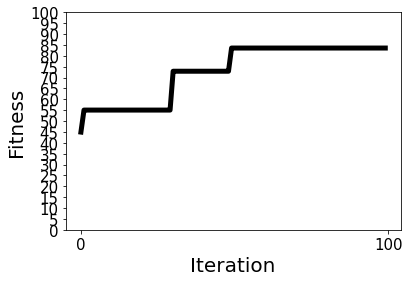

In [43]:
%matplotlib inline
import matplotlib
matplotlib.pyplot.plot(accuracies, linewidth=5, color="black")
matplotlib.pyplot.xlabel("Iteration", fontsize=20)
matplotlib.pyplot.ylabel("Fitness", fontsize=20)
matplotlib.pyplot.xticks(numpy.arange(0, num_generations+1, 100), fontsize=15)
matplotlib.pyplot.yticks(numpy.arange(0, 101, 5), fontsize=15)
matplotlib.pyplot.show()

In [44]:
import pickle
f = open("/content/drive/MyDrive/bankauth_weights_"+str(num_generations)+"_iterations_"+str(mutation_percent)+"%_mutation.pkl", "wb")
pickle.dump(pop_weights_mat, f)
f.close()

In [45]:
acc, predictions = predict_outputs(best_weights, test.to_numpy(), numpy.array(y_test), activation="sigmoid")
print("Test Accuracy of the best solution is : ", acc)

Test Accuracy of the best solution is :  81.81818181818183


In [46]:
print(predictions)

[1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.]


In [14]:
import pickle
file = open('/content/drive/MyDrive/bankauth_weights_100_iterations_10%_mutation.pkl', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()


In [9]:
best_weights = data[0, :]
acc, predictions = predict_outputs(best_weights, test.to_numpy(), numpy.array(y_test), activation="sigmoid")
print("Accuracy of the best solution is : ", acc)

Accuracy of the best solution is :  81.81818181818183


In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)
score = accuracy_score(y_test, predictions)
print(score)
report = classification_report(y_test, predictions)
print(report)

[[111  47]
 [  3 114]]
0.8181818181818182
              precision    recall  f1-score   support

           0       0.97      0.70      0.82       158
           1       0.71      0.97      0.82       117

    accuracy                           0.82       275
   macro avg       0.84      0.84      0.82       275
weighted avg       0.86      0.82      0.82       275



Accuracy of the best solution is :  81.81818181818183
[0.         0.29746835 1.        ]
[0.         0.97435897 1.        ]


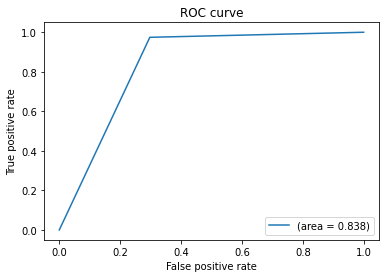

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


best_weights = data[0, :]
acc, predictions = predict_outputs(best_weights, test.to_numpy(), numpy.array(y_test), activation="sigmoid")
print("Accuracy of the best solution is : ", acc)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predictions)
tp = tpr_keras
fp = fpr_keras
print(fpr_keras)
print(tpr_keras)



auc_rf = auc(fp, tp)
plt.plot(fp,tp,label="(area = {:.3f})".format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [18]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

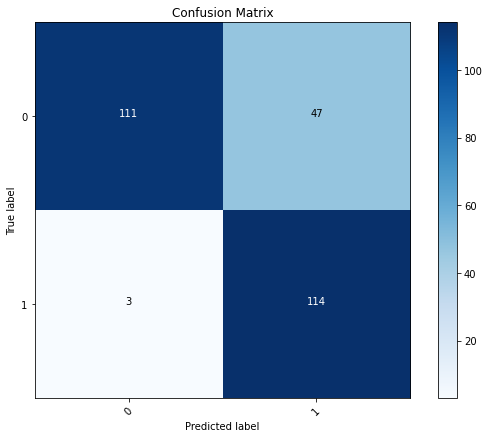

In [30]:
plot_confusion_matrix(cm           = np.array([[ 111, 47],
                                              [  3, 114]]), 
                      normalize    = False,
                      target_names = ['0', '1', ],
                      title        = "Confusion Matrix")

In [13]:
sol_per_pop = 20
num_parents_mating = 10
num_generations = 100
mutation_percent = 10

#Creating the initial population.
initial_pop_weights = []
for curr_sol in numpy.arange(0, sol_per_pop):
    HL1_neurons = 150
    input_HL1_weights = numpy.random.uniform(low=-0.4, high=0.4, 

                                             size=(train.to_numpy().shape[1], HL1_neurons))

    HL2_neurons = 60
    HL1_HL2_weights = numpy.random.uniform(low=-0.4, high=0.4, 

                                             size=(HL1_neurons, HL2_neurons))

    output_neurons = 2
    HL2_output_weights = numpy.random.uniform(low=-0.4, high=0.4, 

                                              size=(HL2_neurons, output_neurons))

    initial_pop_weights.append(numpy.array([input_HL1_weights, 

                                                HL1_HL2_weights, 

                                                HL2_output_weights]))

pop_weights_mat = numpy.array(initial_pop_weights)
pop_weights_vector = mat_to_vector(pop_weights_mat)

best_outputs = []
accuracies = numpy.empty(shape=(num_generations))

trainarr = train.to_numpy()
print(train.to_numpy().shape)

for generation in range(num_generations):
    print("Generation : ", generation)

    # converting the solutions from being vectors to matrices.
    pop_weights_mat = vector_to_mat(pop_weights_vector, 
                                       pop_weights_mat)

    # Measuring the fitness of each chromosome in the population.
    fitness = fitnessfun(pop_weights_mat, 
                          trainarr, 
                          numpy.array(y_train), 
                          activation="sigmoid")

    accuracies[generation] = fitness[0]
    print("Fitness")
    print(fitness)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(pop_weights_vector, 

                                    fitness.copy(), 

                                    num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,

                                       offspring_size=(pop_weights_vector.shape[0]-parents.shape[0], pop_weights_vector.shape[1]))

    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover, 

                                     mutation_percent=mutation_percent)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    pop_weights_vector[0:parents.shape[0], :] = parents
    pop_weights_vector[parents.shape[0]:, :] = offspring_mutation

pop_weights_mat = vector_to_mat(pop_weights_vector, pop_weights_mat)
best_weights = pop_weights_mat [0, :]
acc, predictions = predict_outputs(best_weights, train.to_numpy(), numpy.array(y_train), activation="sigmoid")
print("Accuracy of the best solution is : ", acc)



# f = open("weights_"+str(num_generations)+"_iterations_"+str(mutation_percent)+"%_mutation.pkl", "wb")
# pickle.dump(pop_weights_mat, f)
# f.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1097, 4)
Generation :  0
Fitness
[44.30264357 55.05925251 55.05925251 55.05925251 55.05925251 55.05925251
 55.05925251 55.05925251 55.05925251 55.05925251 55.05925251 44.94074749
 44.94074749 55.05925251 44.94074749 44.94074749 55.05925251 55.05925251
 44.94074749 55.05925251]
Parents
[[-0.06204699 -0.06995991  0.0673548  ...  0.29949507  0.29096963
   0.31903053]
 [ 0.03043994 -0.01515914 -0.36660809 ...  0.07189007 -0.18563065
   0.38405147]
 [-0.04375748 -0.02432801  0.00891465 ...  0.00527238  0.00243603
   0.00363561]
 ...
 [ 0.19898749  0.13362681  0.04279279 ... -0.18469201  0.26168505
   0.15837967]
 [ 0.17243563  0.09482289 -0.35748993 ... -0.31726033 -0.31142938
   0.08443127]
 [ 0.14291628  0.18059094  0.06610179 ... -0.28090389  0.38692878
  -0.12906748]]
Crossover
[[-0.06204699 -0.06995991  0.0673548  ...  0.07189007 -0.18563065
   0.38405147]
 [ 0.03043994 -0.01515914 -0.36660809 ...  0.00527238  0.00243603
   0.00363561]
 [-0.04375748 -0.02432801  0.00891465 ... -0.0228

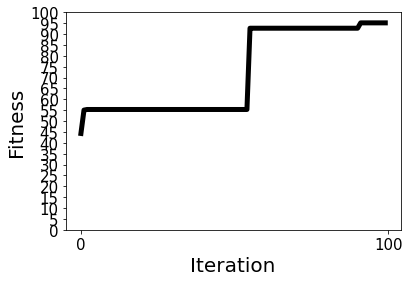

In [14]:
%matplotlib inline
import matplotlib
matplotlib.pyplot.plot(accuracies, linewidth=5, color="black")
matplotlib.pyplot.xlabel("Iteration", fontsize=20)
matplotlib.pyplot.ylabel("Fitness", fontsize=20)
matplotlib.pyplot.xticks(numpy.arange(0, num_generations+1, 100), fontsize=15)
matplotlib.pyplot.yticks(numpy.arange(0, 101, 5), fontsize=15)
matplotlib.pyplot.show()

In [15]:
import pickle
f = open("/content/drive/MyDrive/bankauth_0.4_weights_"+str(num_generations)+"_iterations_"+str(mutation_percent)+"%_mutation.pkl", "wb")
pickle.dump(pop_weights_mat, f)
f.close()

In [16]:
acc, predictions = predict_outputs(best_weights, test.to_numpy(), numpy.array(y_test), activation="sigmoid")
print("Test Accuracy of the best solution is : ", acc)

Test Accuracy of the best solution is :  93.45454545454545


In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)
score = accuracy_score(y_test, predictions)
print(score)
report = classification_report(y_test, predictions)
print(report)

[[140  18]
 [  0 117]]
0.9345454545454546
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       158
           1       0.87      1.00      0.93       117

    accuracy                           0.93       275
   macro avg       0.93      0.94      0.93       275
weighted avg       0.94      0.93      0.93       275



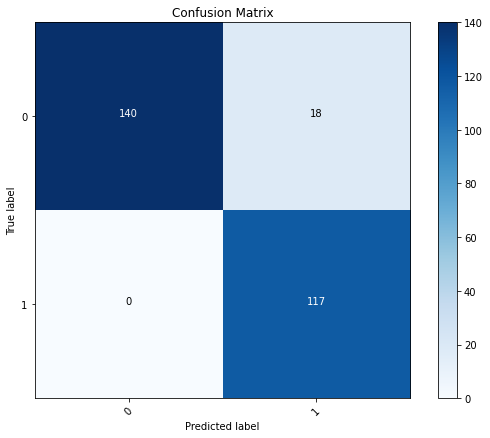

In [19]:
plot_confusion_matrix(cm           = np.array([[ 140, 18],
                                              [  0, 117]]), 
                      normalize    = False,
                      target_names = ['0', '1', ],
                      title        = "Confusion Matrix")

[0.         0.11392405 1.        ]
[0. 1. 1.]


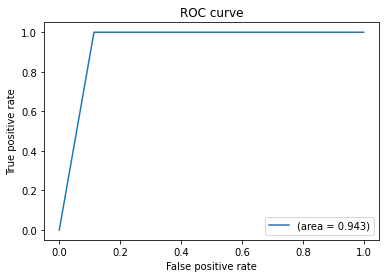

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


# best_weights = data[0, :]
# acc, predictions = predict_outputs(best_weights, test.to_numpy(), numpy.array(y_test), activation="sigmoid")
# print("Accuracy of the best solution is : ", acc)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predictions)
tp = tpr_keras
fp = fpr_keras
print(fpr_keras)
print(tpr_keras)



auc_rf = auc(fp, tp)
plt.plot(fp,tp,label="(area = {:.3f})".format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
